In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
AE4 = np.array(pd.read_csv ('../data/processed_data/AE4.csv'))
y = np.array(AE4[:,-1],dtype=int)
AE4 = AE4[:,0:-1]


In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4,y)

In [5]:
print(AE4.shape, len(pred))
acc = model.score_
print(acc)

(1473, 2966) 1473
0.07269789983844911


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (135.0, 1722.0, 0.078397212543554, 0.216, 0.9938670627076811, 0.07269789983844911, 0.9982471641620193, 0.9273021001615509, 0.784)


# Mutual information maximizer (MIM)

test 0.2115007130264876 0.019672491966484455
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (247.0, 1721.0, 0.14352120859965137, 0.4137353433835846, 0.9921024614989262, 0.12550813008130082, 0.9983837077743656, 0.8744918699186992, 0.5862646566164154)


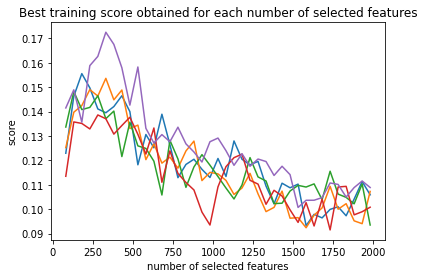

In [8]:
#Define parameters for MIM method
N = np.arange(80,2000,50)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Anova F test

test 0.2307930760518846 0.019086651277546694
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (277.0, 1662.0, 0.16666666666666666, 0.4159159159159159, 0.9930850267112686, 0.14285714285714285, 0.998372895534874, 0.8571428571428571, 0.5840840840840841)


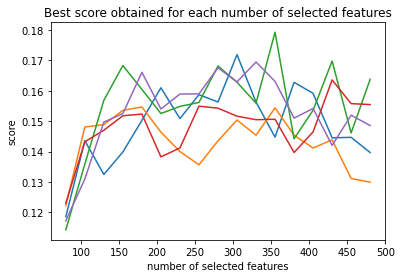

In [7]:
#Define parameters for ANOVA method
N = np.arange(80,500,25)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

In [9]:
#Create .csv with names of this subset
best_subset = subset
get_best_genes_names(best_subset, '../data/processed_data/AE4genes_interest.csv', '../data/optimized_subsets/AE4genes_best.csv')

1
test 0.21341123349120356 0.025330103176023546
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (236.0, 1652.0, 0.14285714285714285, 0.3575757575757576, 0.99346203468446, 0.125, 0.9983137800755617, 0.875, 0.6424242424242425)


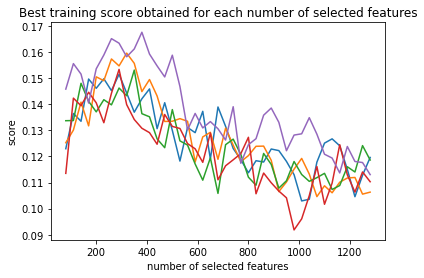

2
test 0.22500252678285637 0.04236907517818261
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (246.0, 1594.0, 0.15432873274780426, 0.34119278779472956, 0.9943494613554912, 0.13369565217391305, 0.9983094761867477, 0.866304347826087, 0.6588072122052705)


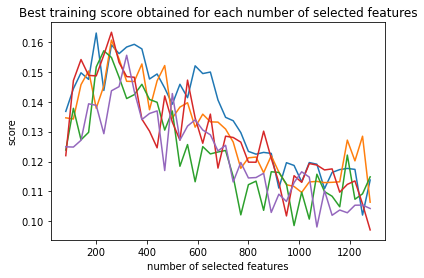

3
test 0.2248447544114504 0.025196724883323446
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (260.0, 1544.0, 0.16839378238341968, 0.37518037518037517, 0.9944717950554074, 0.14412416851441243, 0.9984434762603169, 0.8558758314855875, 0.6248196248196248)


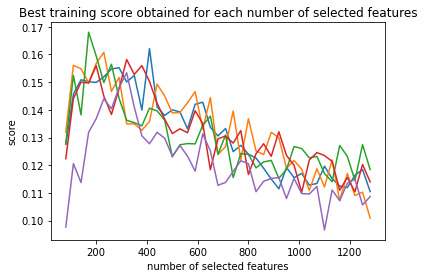

4
test 0.22350712844091075 0.0258103572156683
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (267.0, 1640.0, 0.1628048780487805, 0.41915227629513346, 0.9928612159438648, 0.14001048767697954, 0.9983804675633916, 0.8599895123230205, 0.5808477237048666)


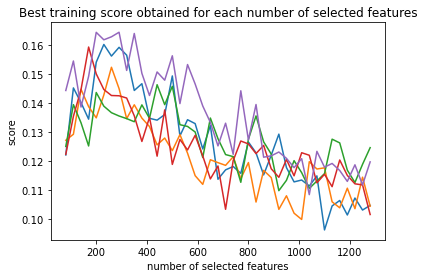

5
test 0.20437708237518856 0.02352180847630652
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (266.0, 1693.0, 0.15711754282339044, 0.44333333333333336, 0.9919911822585529, 0.13578356304236855, 0.9984097737022277, 0.8642164369576314, 0.5566666666666666)


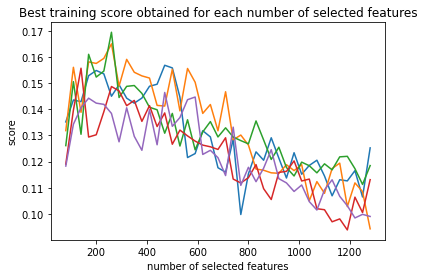

6
test 0.20188030950156383 0.03011885696626727
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (226.0, 1609.0, 0.14045991298943444, 0.3210227272727273, 0.9941310572486367, 0.12316076294277929, 0.9982492381622129, 0.8768392370572207, 0.6789772727272727)


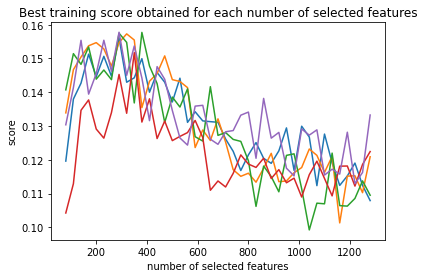

7
test 0.21969460172494437 0.040025258108223785
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (252.0, 1588.0, 0.15869017632241814, 0.3442622950819672, 0.9944557525059091, 0.13695652173913042, 0.9983176489143578, 0.8630434782608696, 0.6557377049180327)


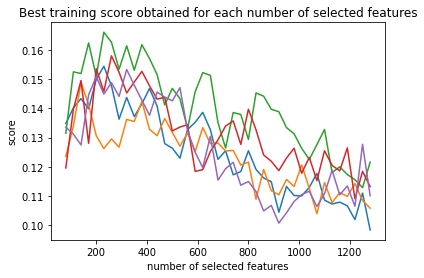

8
test 0.2202649428337843 0.036657547470504315
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (221.0, 1547.0, 0.14285714285714285, 0.3065187239944521, 0.9948392391297096, 0.125, 0.9983261637346634, 0.875, 0.6934812760055479)


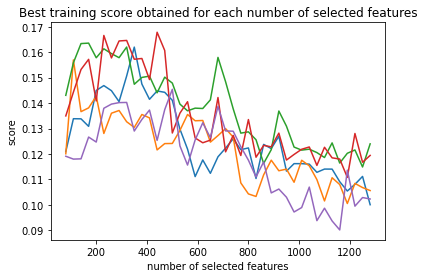

9
test 0.22863386766063667 0.018537120240418696
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (266.0, 1658.0, 0.16043425814234016, 0.38328530259365995, 0.993660770954249, 0.13825363825363826, 0.9983558444352248, 0.8617463617463618, 0.6167146974063401)


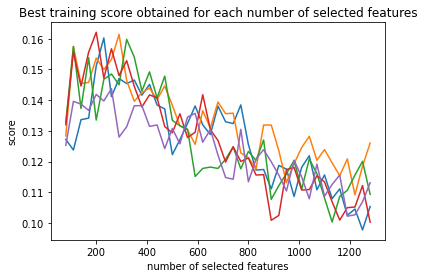

10
test 0.21456006529745864 0.01738443803710956
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (284.0, 1675.0, 0.16955223880597015, 0.4322678843226788, 0.9925429282473878, 0.14497192445125065, 0.998329728592091, 0.8550280755487494, 0.5677321156773212)


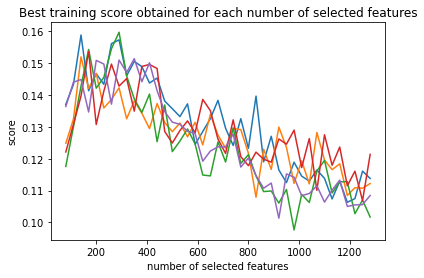

11
test 0.23136025978978653 0.02777025557234732
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (254.0, 1620.0, 0.15679012345679014, 0.3597733711048159, 0.9940355657008211, 0.13553895410885805, 0.9983286619681854, 0.8644610458911419, 0.6402266288951841)


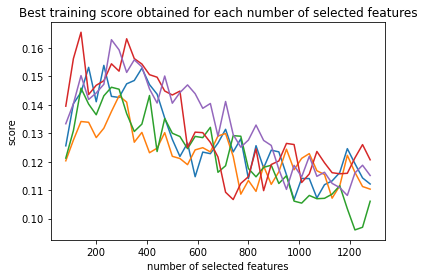

12
test 0.22076749464710482 0.044534007333247964
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (267.0, 1637.0, 0.16310323762981063, 0.43344155844155846, 0.9928624684435646, 0.1402310924369748, 0.9984697210858403, 0.8597689075630253, 0.5665584415584416)


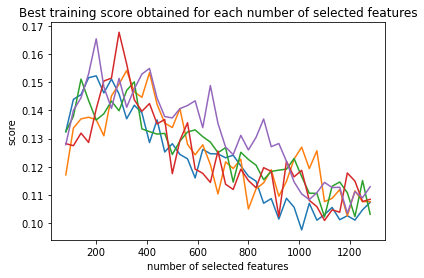

In [8]:
neighbors =  np.arange(1,13,1)
score_plot = []

for p in neighbors:
    print(p)
    #Define parameters for MIM method
    N = np.arange(80,1300,30)
    kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

    subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

    mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
    print('test', mean_score_test, std_score_test)

    #Predict and evaluate on whole data  set
    model = FamiliesClusters(np.unique(y),compute_precision,True)
    x_subset = AE4[:, subset]
    pred = model.fit_predict(x_subset,y)

    print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))
    plt.show()

# Hybrid methods

# Mutual information and stimulated annealing

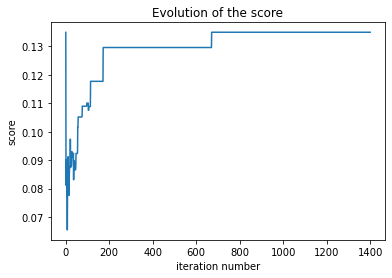

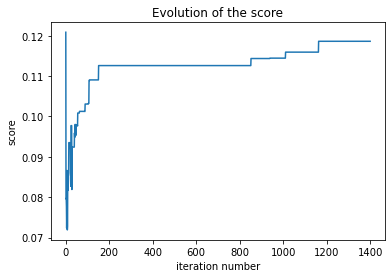

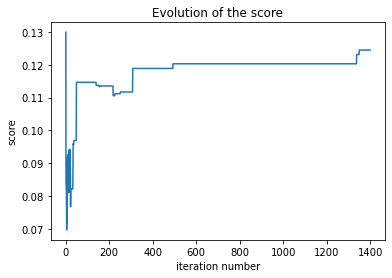

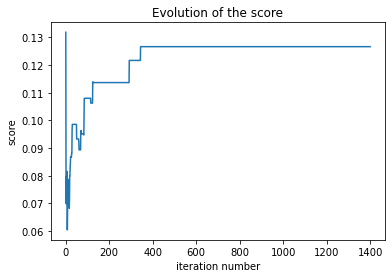

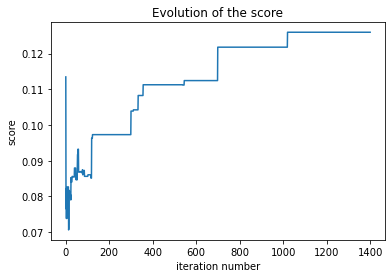

test 0.1493446241301824 0.036359306888644576
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (200.0, 1646.0, 0.12150668286755771, 0.3081664098613251, 0.9936608924046245, 0.10834236186348863, 0.9982627939998685, 0.8916576381365113, 0.6918335901386748)


In [9]:
#Define parameters for MI + stimulated annealing method
N = np.array([700])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [10]:
#Define parameters for MI + genetic algorithm method
N = np.array([700])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/genetic_selection/gscv.py", line 126, in _evalFunction
    scores = cross_val_score(estimator=estimator, X=X_selected, y=y, groups=groups, scoring=scorer,
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/dormann/opt/anac